In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Statement of the Problem**
Find a good approximation for the weakly perturbed linear oscillator:
$$
\newcommand{\mtab}{\quad\quad\quad\quad}
\mtab\ddot{x}+x+\epsilon h(x,\dot{x})=0
$$
as $\epsilon \to 0$.

The approximations are all of the form:
$$
\mtab x = x_0 + \epsilon x_1 + O(\epsilon^2)
$$


**First Example**

Linear equation:
$$
\mtab \ddot{x}+x+2\epsilon\dot{x}=0
$$
with initial conditions $x(0)=0$ and $\dot{x}(0)=1$. This has the exact solution:
$$
\mtab
x(t,\epsilon)=\frac{e^{-\epsilon t}}{(1-\epsilon^2)^{1/2}}\sin\left((1-\epsilon^2)^{1/2}t\right)
$$
The following plots show the solution for three values of $\epsilon$.

In [2]:
def exact_solution_linear(t, epsilon):
    c = sqrt(1-epsilon * epsilon)
    return exp(-epsilon * t) / c * sin(c * t)

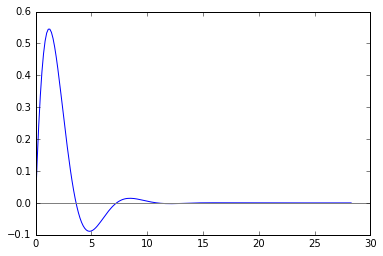

In [3]:
t = linspace(0, 9*pi, 200)
epsilon = 0.5
x = exact_solution_linear(t, epsilon)
plot(t, x)
axhline(0, color='gray')

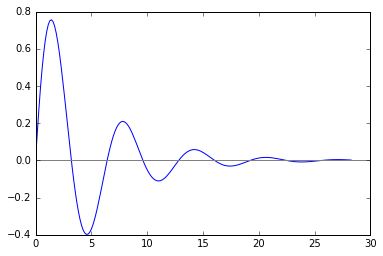

In [4]:
epsilon = 0.2
x = exact_solution_linear(t, epsilon)
plot(t, x)
axhline(0, color='gray')

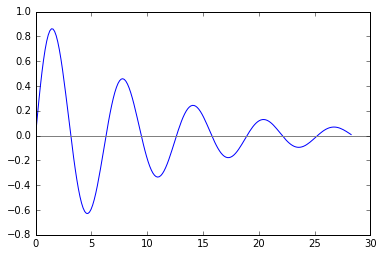

In [5]:
epsilon = 0.1
x = exact_solution_linear(t, epsilon)
plot(t, x)
axhline(0, color='gray')

**Regular perturbation**
In this method, simply match the the coefficients of the Taylor expasion. The approximation obtained is:
$$
\mtab
x(t,\epsilon) = \sin t - \epsilon t \sin t + O(\epsilon^2)
$$
This is valed for a fixed $t$ as $\epsilon\to0$, but is not a good approximation as $t$ grows for a fixed $\epsilon$, as shown in the following graph:

In [6]:
def regular_perturbation(t,epsilon):
    return sin(t) - epsilon * t * sin(t)

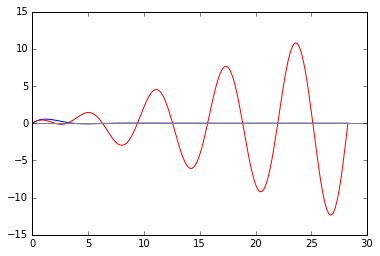

In [7]:
epsilon = 0.5
x = exact_solution_linear(t, epsilon)
plot(t, x)
x = regular_perturbation(t, epsilon)
plot(t, x, color='r')
axhline(0, color='gray')

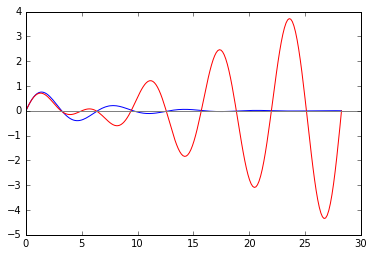

In [8]:
epsilon = 0.2
x = exact_solution_linear(t, epsilon)
plot(t, x)
x = regular_perturbation(t, epsilon)
plot(t, x, color='r')
axhline(0, color='gray')

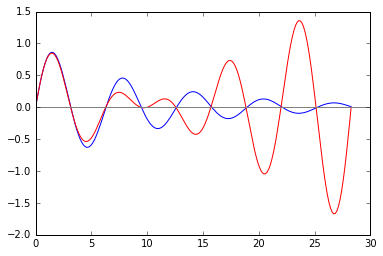

In [9]:
epsilon = 0.1
x = exact_solution_linear(t, epsilon)
plot(t, x)
x = regular_perturbation(t, epsilon)
plot(t, x, color='r')
axhline(0, color='gray')

**Two-timing for the linear equation**
The approximation obtained in this case is:
$$
\mtab
x(t,\epsilon)=e^{-\epsilon t}\sin(t)
$$
Here are the graphs:

In [10]:
def two_timing_linear(t,epsilon):
    return exp(-epsilon * t) * sin(t)

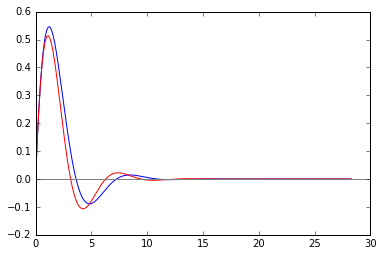

In [11]:
epsilon = 0.5
x = exact_solution_linear(t, epsilon)
plot(t, x)
x = two_timing_linear(t, epsilon)
plot(t, x, color='r')
axhline(0, color='gray')

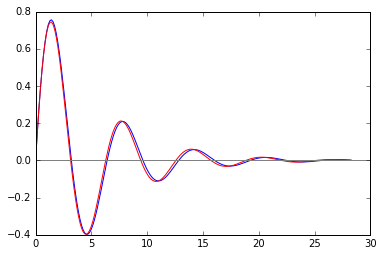

In [12]:
epsilon = 0.2
x = exact_solution_linear(t, epsilon)
plot(t, x)
x = two_timing_linear(t, epsilon)
plot(t, x, color='r')
axhline(0, color='gray')

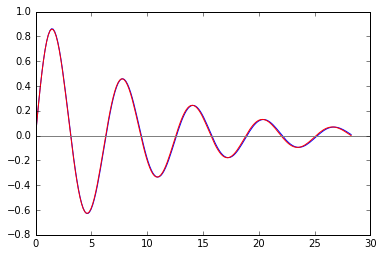

In [13]:
epsilon = 0.1
x = exact_solution_linear(t, epsilon)
plot(t, x)
x = two_timing_linear(t, epsilon)
plot(t, x, color='r')
axhline(0, color='gray')

**Van der pol oscillator**
The equation is:
$$
\mtab
\ddot{x}+x+\epsilon(1-x^2)\dot{x}
$$
The two-time approximation is:
$$
x(t,\epsilon)=\frac{2}{(1+3e^{-\epsilon t})^{1/2}}cos(t) + O(\epsilon)
$$
Drawing the graph is a little more complicated, because we need to compute a numerical solution for the Van der Pol equation.

In [14]:
from scipy.integrate import odeint
def solve_de(sysfunc, y0, t0, tmin, tmax, npoints=200, **kwargs):
    tleft = linspace(t0, tmin, npoints)
    yleft = odeint(sysfunc, y0, tleft, **kwargs)
    tright = linspace(t0, tmax, npoints)
    yright = odeint(sysfunc, y0, tright, **kwargs)
    return concatenate((yleft[-1:0:-1], yright))

In [15]:
def sysfunc(xvec, t, epsilon):
    x, y = xvec
    return array([ y,
                   -x - epsilon * ( x ** 2 - 1) * y])

In [16]:
def two_timing_vdp(t,epsilon):
    return 2 / (1 + 3 * exp(-epsilon * t)) ** 0.5 * cos(t)

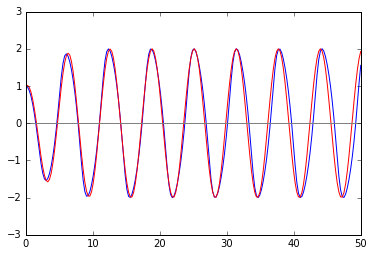

In [17]:
t = linspace(0,50,200)
epsilon = 0.5
x0 = [1, 0]
solution = odeint(sysfunc, x0, t, (epsilon,))
x = solution[:,0]
plot(t,x)
x = two_timing_vdp(t, epsilon)
plot(t, x, color='r')
axhline(0, color='gray')

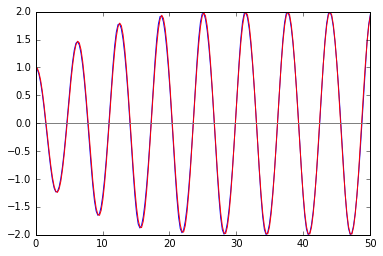

In [18]:
epsilon = 0.2
x0 = [1, 0]
solution = odeint(sysfunc, x0, t, (epsilon,))
x = solution[:,0]
plot(t,x)
x = two_timing_vdp(t, epsilon)
plot(t, x, color='r')
axhline(0, color='gray')

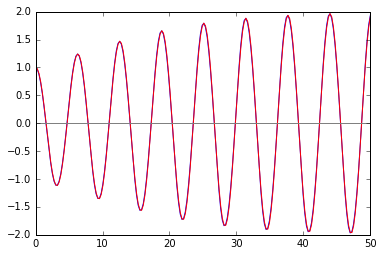

In [19]:
epsilon = 0.1
x0 = [1, 0]
solution = odeint(sysfunc, x0, t, (epsilon,))
x = solution[:,0]
plot(t,x)
x = two_timing_vdp(t, epsilon)
plot(t, x, color='r')
axhline(0, color='gray')